In [193]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import re # 정규표현식
import warnings
warnings.filterwarnings('ignore') # warning 메시지 제거
import seaborn as sns # 시각화
import graphviz # 시각화

# VAR 모형 돌리기 위해 필요한 패키지 설치
from statsmodels.tsa.vector_ar.var_model import VARProcess
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
import statsmodels.api as sm

# 한글 폰트 지정
# plt.rc('font', family='AppleGothic') # 맥
plt.rc('font', family='Malgun Gothic') # 윈도우

# 마이너스 값 깨지는 현상 해결
plt.rc('axes', unicode_minus=False)

# 레티나 디스플레이 설정
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

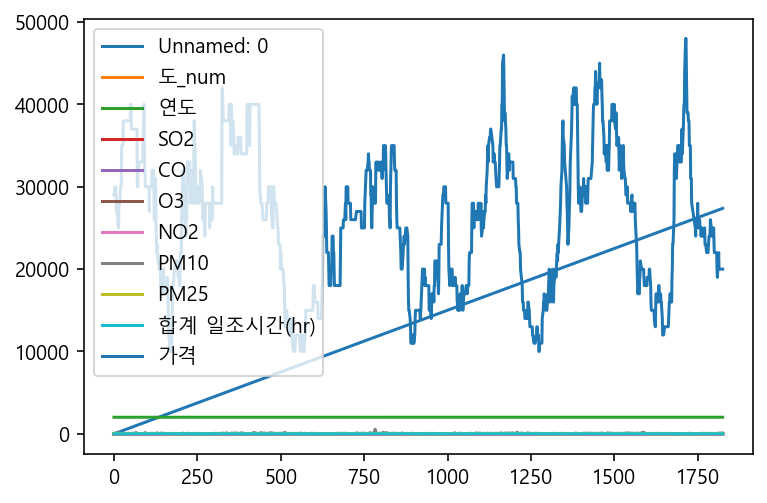

In [199]:
# 서울특별시 13-17 데이터 잘라서 모형에 쓰기
seoul = read_csv('C:/Users/chuu/Documents/GitHub/Learning_Spoons_Second_Project/data/도_분할/서울특별시.csv')
seoul1317 = seoul[seoul['일시'].str.contains('2013|2014|2015|2016|2017')]
seoul1317.plot()
pyplot.show()

In [200]:
seoul1317.head(20)

,Unnamed: 0,일시,도_num,연도,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr),품종명,도,마켓명,가격
0,3,2013-01-01,3,2013,0.005741,0.658125,0.008458,0.043541,38.334375,31.543635,4.6,토마토(10kg),서울특별시,가락도매,29000.000000
1,18,2013-01-02,3,2013,0.004950,0.403021,0.024425,0.021413,18.644792,37.602906,9.1,토마토(10kg),서울특별시,가락도매,29000.000000
2,33,2013-01-03,3,2013,0.006396,0.512396,0.018154,0.028391,29.743750,35.062375,9.1,토마토(10kg),서울특별시,가락도매,30000.000000
3,48,2013-01-04,3,2013,0.007002,0.738021,0.008473,0.047785,45.383333,37.749110,9.2,토마토(10kg),서울특별시,가락도매,30000.000000
4,63,2013-01-05,3,2013,0.007673,1.020625,0.003945,0.065136,62.270833,33.378771,7.5,토마토(10kg),서울특별시,가락도매,30000.000000
5,78,2013-01-06,3,2013,0.009809,1.138958,0.008473,0.055007,86.827083,23.495793,8.2,토마토(10kg),서울특별시,가락도매,30000.000000
6,93,2013-01-07,3,2013,0.008350,1.094792,0.006366,0.062664,74.414583,30.667985,5.8,토마토(10kg),서울특별시,가락도매,30000.000000
7,108,2013-01-08,3,2013,0.009403,1.091354,0.010590,0.055735,69.852083,27.463894,8.0,토마토(10kg),서울특별시,가락도매,27000.000000
8,123,2013-01-09,3,2013,0.006489,0.517500,0.019678,0.031636,33.479167,27.224864,9.3,토마토(10kg),서울특별시,가락도매,27000.000000
9,138,2013-01-10,3,2013,0.007560,0.706562,0.011363,0.046038,41.328125,20.465040,9.1,토마토(10kg),서울특별시,가락도매,27000.000000


In [201]:
m2 = sm.tsa.VAR(seoul1317[['SO2','CO','O3','NO2','PM10','PM25','합계 일조시간(hr)','가격']])
r = m2.fit()
print(r.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 25, Mar, 2020
Time:                     15:59:29
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                   -13.6905
Nobs:                     1825.00    HQIC:                  -13.8277
Log likelihood:          -7953.60    FPE:                9.11805e-07
AIC:                     -13.9078    Det(Omega_mle):     8.76618e-07
--------------------------------------------------------------------
Results for equation SO2
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.001360         0.000156            8.741           0.000
L1.SO2                 0.669621         0.025123           26.654           0.000
L1.CO                  0.000511         0.000277          

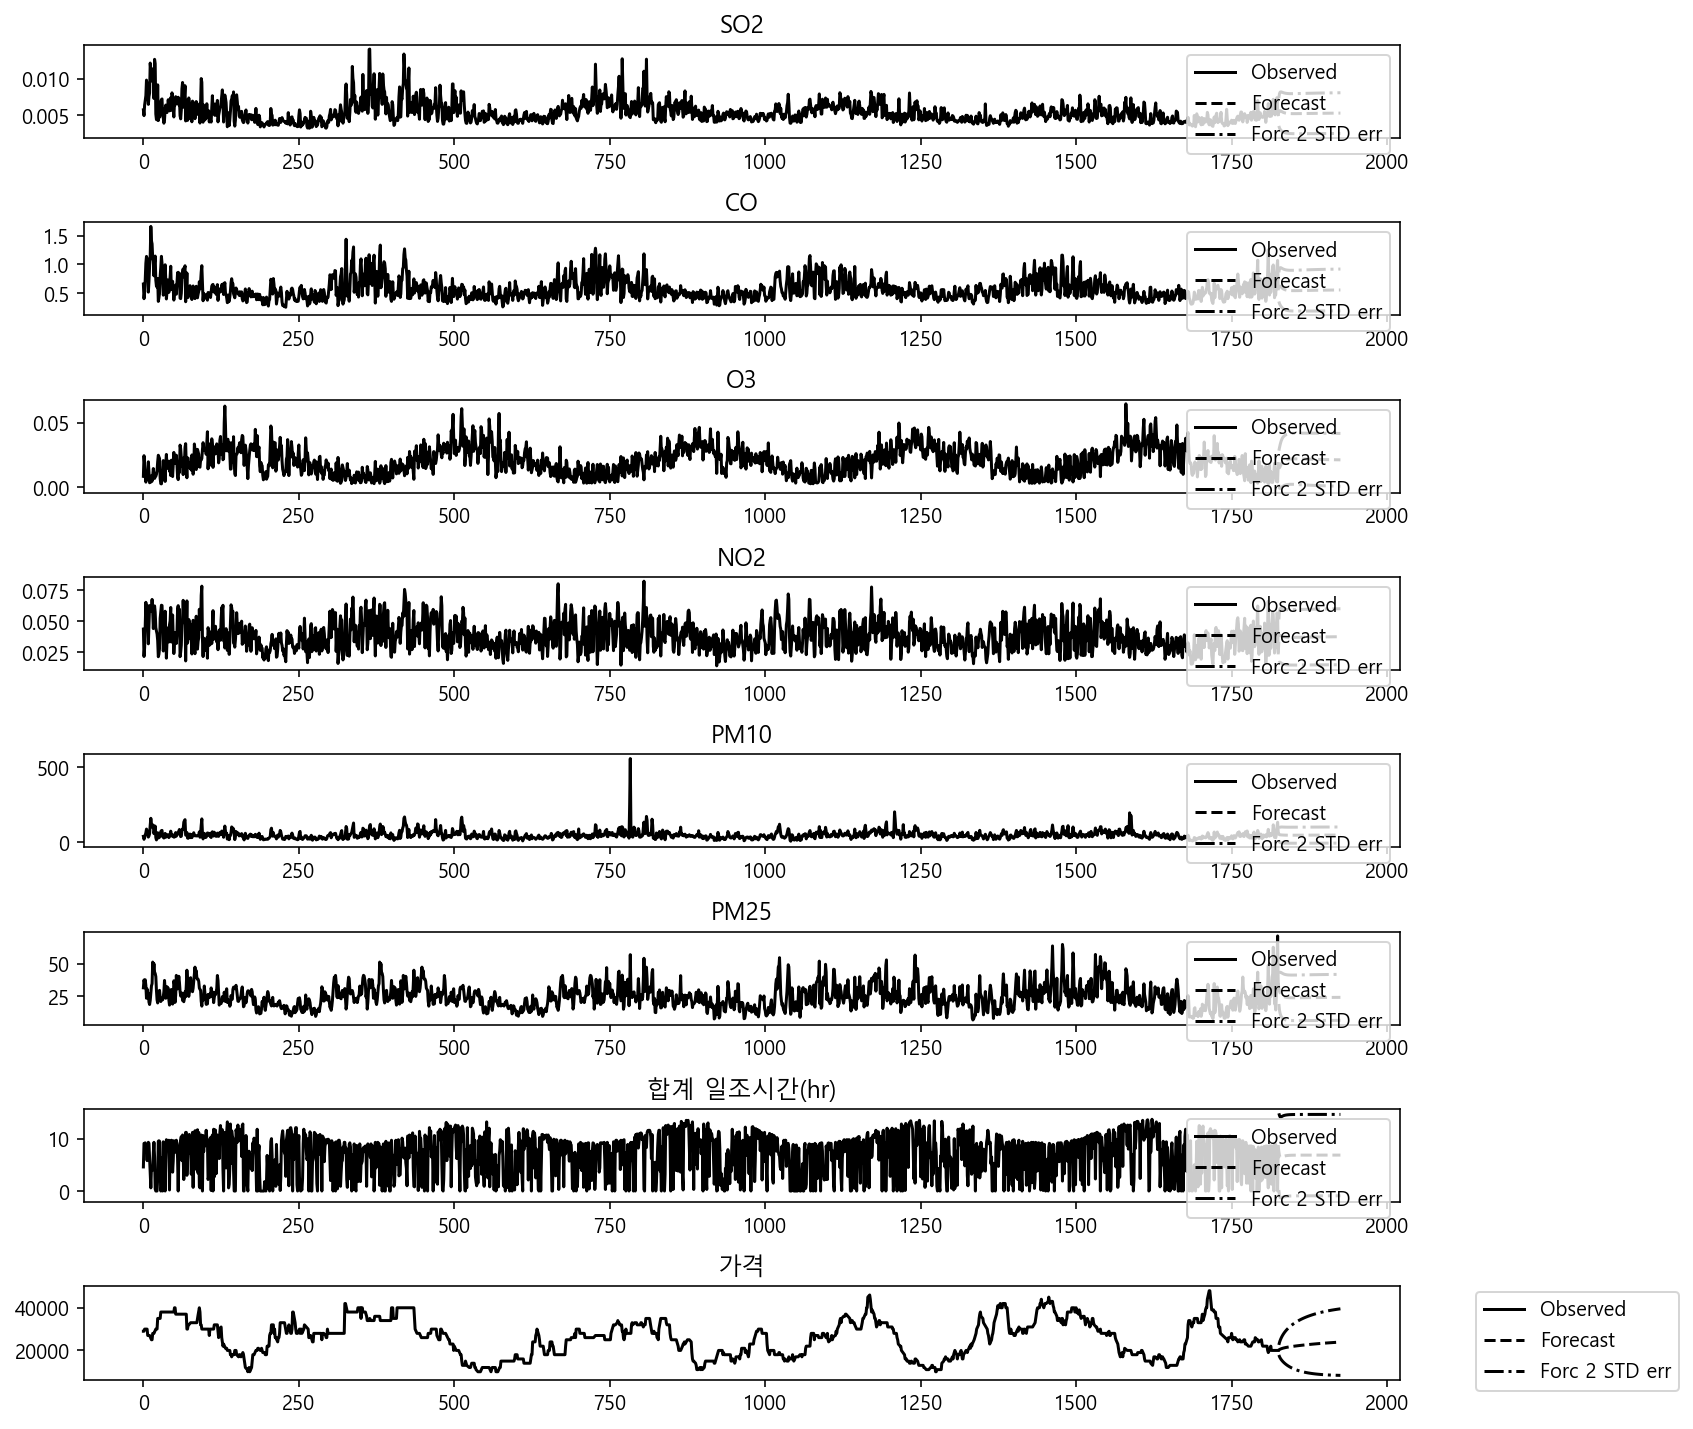

In [202]:
fig = r.plot_forecast(steps=100, alpha=0.05, plot_stderr=True)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05,1.05), scatterpoints=1 )
plt.show()

In [203]:
irf = r.irf(10)

<Figure size 1800x1800 with 0 Axes>

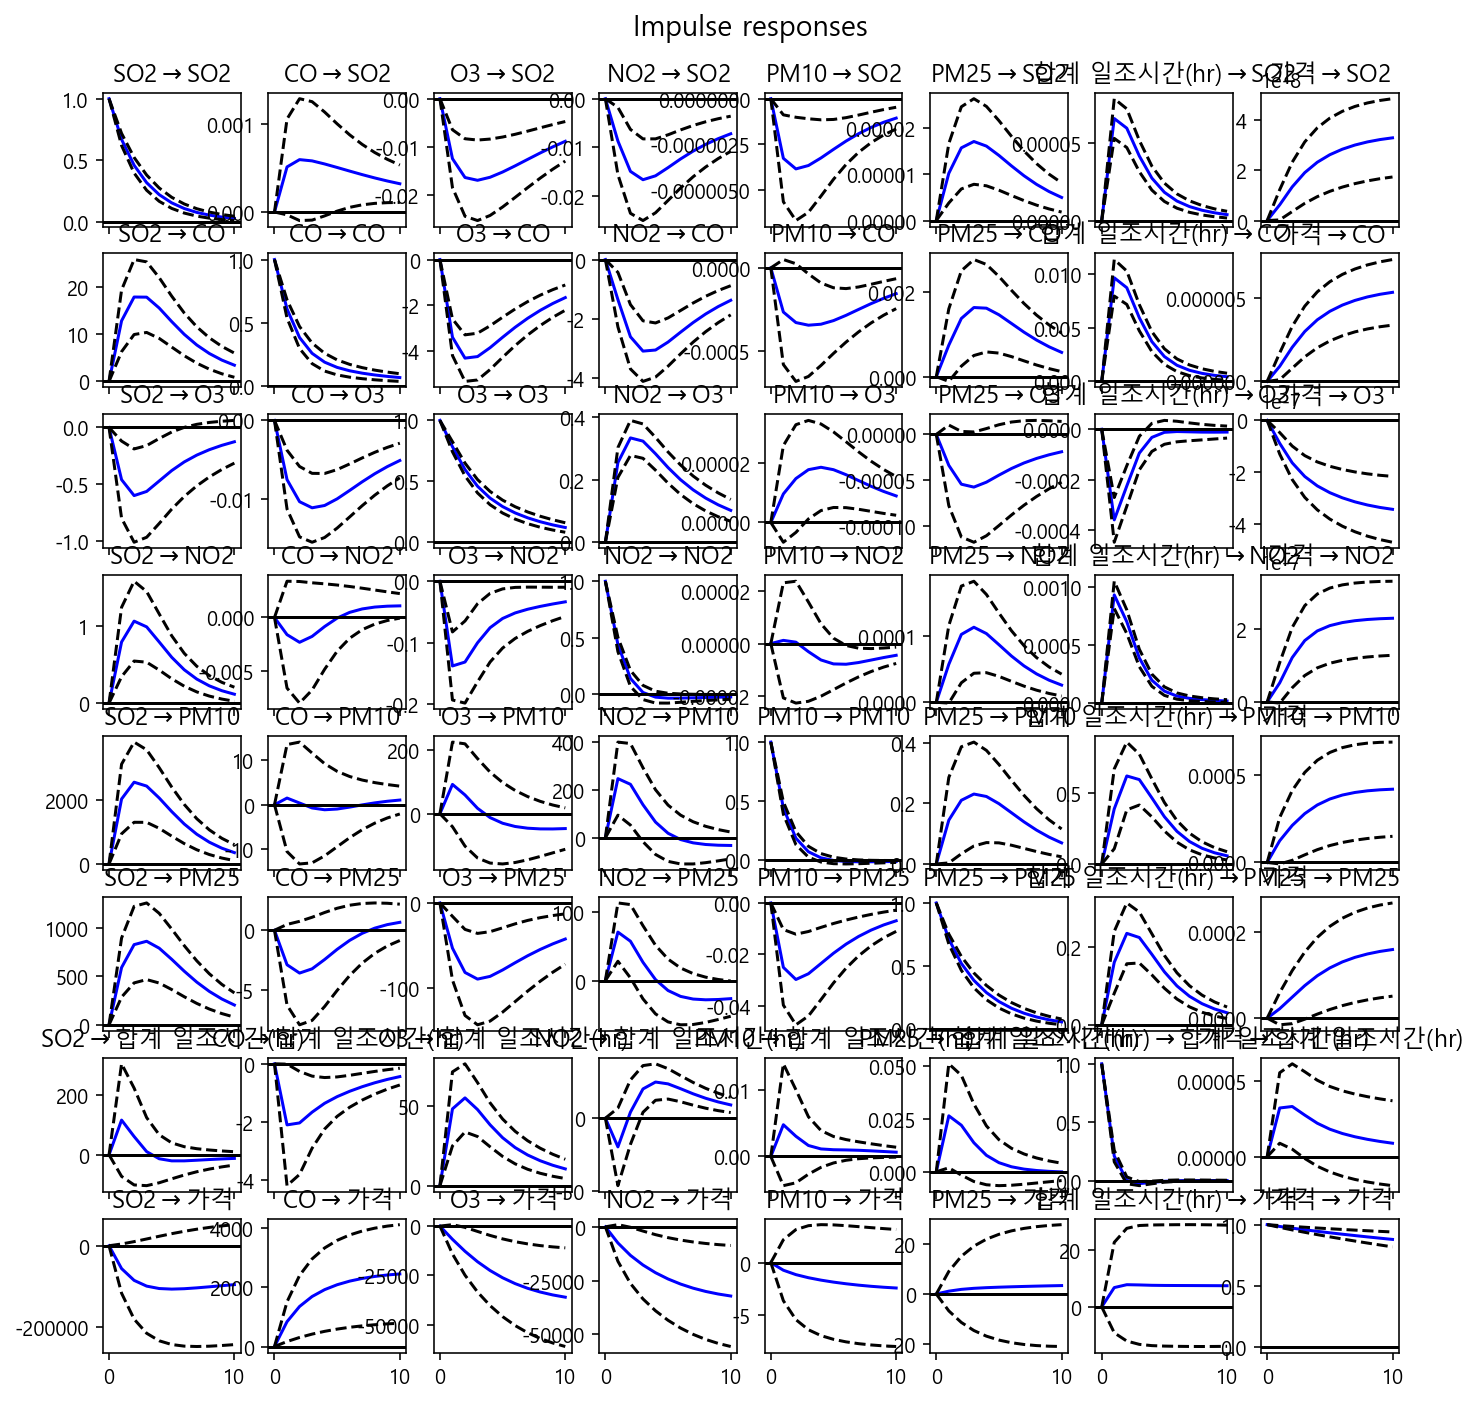

In [204]:
plt.figure(figsize=(25,25))
irf.plot()
plt.tight_layout()
plt.show()

In [205]:
seoul[seoul['일시'].str.contains('2018')]

,Unnamed: 0,일시,도_num,연도,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr),품종명,도,마켓명,가격
1826,27393,2018-01-01,3,2018,0.005824,0.646306,0.010054,0.036131,44.621096,25.149494,8.3,토마토(10kg),서울특별시,가락도매,20000.000000
1827,27408,2018-01-02,3,2018,0.005581,0.766784,0.009671,0.039934,43.081216,28.399253,7.9,토마토(10kg),서울특별시,가락도매,20000.000000
1828,27423,2018-01-03,3,2018,0.005343,0.498402,0.014375,0.026844,36.787107,25.217416,8.6,토마토(10kg),서울특별시,가락도매,18000.000000
1829,27438,2018-01-04,3,2018,0.005480,0.617400,0.008677,0.038470,48.132535,30.094731,6.2,토마토(10kg),서울특별시,가락도매,18000.000000
1830,27453,2018-01-05,3,2018,0.006063,0.745489,0.007119,0.046140,60.172874,35.788229,8.2,토마토(10kg),서울특별시,가락도매,18000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,32793,2018-12-27,3,2018,0.004032,0.379486,0.020419,0.018168,26.936196,8.213841,8.7,토마토(10kg),서울특별시,가락도매,26000.000000
2187,32808,2018-12-28,3,2018,0.004344,0.472366,0.013871,0.024360,35.554710,12.722472,8.7,토마토(10kg),서울특별시,가락도매,26000.000000
2188,32823,2018-12-29,3,2018,0.004220,0.429812,0.019759,0.020323,37.296196,9.219158,8.7,토마토(10kg),서울특별시,가락도매,25666.666667
2189,32838,2018-12-30,3,2018,0.004657,0.639330,0.011581,0.031490,32.668705,16.896871,8.7,토마토(10kg),서울특별시,가락도매,25333.333333
